In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("eurlex_data.txt", delimiter=',', names=['id','doc'])
df.head()

,id,doc
0,14,"""convent intern commiss rhine bern convent le..."
1,17,"""exchang letter commiss intern bureau weight ..."
2,38,"""council decis juli conclus protocol access u..."
3,41,"""addit agreement agreement product clock watc..."
4,42,"""exchang letter india excel mr swaminathan am..."


In [2]:
df.shape

(19348, 2)

##  Data preprocessing 

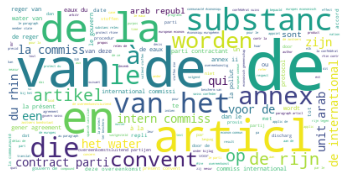

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df['doc'].values 
wordcloud = WordCloud(background_color='white',max_words=500,contour_width=4).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [4]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/irynasavchuk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
stop_words = stopwords.words('english')
add_languages = ['french', 'german', 'italian']

for language in add_languages:
    stop_words += stopwords.words(language)

In [6]:
# Cleaning the texts
corpus = []
for i in tqdm(range(0, len(df))):
    doc = re.sub('[^a-zA-Z]', ' ', df['doc'][i])
    doc = doc.lower()
    doc = doc.split()
    ps = PorterStemmer()
    doc = [ps.stem(word) for word in doc if (len(word)>3) and (not word in set(stop_words))]
    doc = ' '.join(doc)
    corpus.append(doc)

100%|██████████| 19348/19348 [12:19<00:00, 26.15it/s]  


In [7]:
len(corpus)

19348

In [8]:
df['cleaned_doc'] = corpus

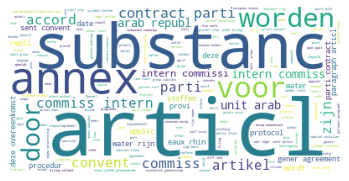

In [9]:
text2 = df['cleaned_doc'].values 
wordcloud = WordCloud(background_color='white',max_words=500,contour_width=4).generate(str(text2))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [10]:
df.to_csv('saved.csv', index=False)

## Creating Features

### Topic discovering via LDA

In [11]:
df = pd.read_csv('saved.csv')
df.head()

,id,doc,cleaned_doc
0,14,"""convent intern commiss rhine bern convent le...",convent intern commiss rhine bern convent gouv...
1,17,"""exchang letter commiss intern bureau weight ...",exchang letter commiss intern bureau weight me...
2,38,"""council decis juli conclus protocol access u...",council deci juli conclu protocol access unit ...
3,41,"""addit agreement agreement product clock watc...",addit agreement agreement product clock watch ...
4,42,"""exchang letter india excel mr swaminathan am...",exchang letter india excel swaminathan ambassa...


In [12]:
df['corpus'] = df.cleaned_doc.apply(lambda x: x.split(' '))
df.corpus[0]

['convent',
 'intern',
 'commiss',
 'rhine',
 'bern',
 'convent',
 'gouvern',
 'publiqu',
 'rale',
 'allemagn',
 'gouvern',
 'publiqu',
 'fran',
 'gouvern',
 'grand',
 'duch',
 'luxembourg',
 'gouvern',
 'royaum',
 'gouvern',
 'conf',
 'suiss',
 'communaut',
 'conomiqu',
 'europ',
 'rant',
 'accord',
 'avril',
 'accord',
 'additionnel',
 'cembr',
 'concern',
 'commiss',
 'intern',
 'protect',
 'rhin',
 'contr',
 'pollut',
 'consid',
 'pollut',
 'chimiqu',
 'eaux',
 'rhin',
 'menac',
 'faun',
 'flore',
 'galement',
 'effet',
 'eaux',
 'conscient',
 'danger',
 'suscept',
 'sulter',
 'certain',
 'utili',
 'eaux',
 'rhin',
 'sireux',
 'lior',
 'qualit',
 'eaux',
 'rhin',
 'utili',
 'consid',
 'rhin',
 'sert',
 'autr',
 'utili',
 'notam',
 'navig',
 'comm',
 'milieu',
 'cepteur',
 'eaux',
 'convaincu',
 'action',
 'intern',
 'protect',
 'eaux',
 'rhin',
 'contr',
 'pollut',
 'chimiqu',
 'doit',
 'appr',
 'relat',
 'autr',
 'effort',
 'ploy',
 'protect',
 'eaux',
 'rhin',
 'particuli',
 'eff

In [13]:
df.head()

,id,doc,cleaned_doc,corpus
0,14,"""convent intern commiss rhine bern convent le...",convent intern commiss rhine bern convent gouv...,"[convent, intern, commiss, rhine, bern, conven..."
1,17,"""exchang letter commiss intern bureau weight ...",exchang letter commiss intern bureau weight me...,"[exchang, letter, commiss, intern, bureau, wei..."
2,38,"""council decis juli conclus protocol access u...",council deci juli conclu protocol access unit ...,"[council, deci, juli, conclu, protocol, access..."
3,41,"""addit agreement agreement product clock watc...",addit agreement agreement product clock watch ...,"[addit, agreement, agreement, product, clock, ..."
4,42,"""exchang letter india excel mr swaminathan am...",exchang letter india excel swaminathan ambassa...,"[exchang, letter, india, excel, swaminathan, a..."


In [14]:
data_words = df.corpus.values.tolist()
len(data_words)

19348

In [15]:
print(data_words[:1][0][:30])

['convent', 'intern', 'commiss', 'rhine', 'bern', 'convent', 'gouvern', 'publiqu', 'rale', 'allemagn', 'gouvern', 'publiqu', 'fran', 'gouvern', 'grand', 'duch', 'luxembourg', 'gouvern', 'royaum', 'gouvern', 'conf', 'suiss', 'communaut', 'conomiqu', 'europ', 'rant', 'accord', 'avril', 'accord', 'additionnel']


In [16]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words) # Create Dictionary
texts = data_words # Create Corpus
corpus = [id2word.doc2bow(text) for text in texts] # Term Document Frequency
print(corpus[:1][0][:30]) # View

/usr/local/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[(0, 2), (1, 2), (2, 3), (3, 1), (4, 3), (5, 5), (6, 1), (7, 2), (8, 1), (9, 1), (10, 8), (11, 1), (12, 1), (13, 1), (14, 2), (15, 2), (16, 2), (17, 1), (18, 2), (19, 2), (20, 2), (21, 5), (22, 2), (23, 1), (24, 33), (25, 5), (26, 1), (27, 1), (28, 1), (29, 3)]


To keep things simple, we’ll keep all the parameters to default except for inputting the number of topics. For this tutorial, we will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [17]:
from pprint import pprint
import gensim

num_topics = 10 # number of topics

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.026*"articl" + 0.024*"quot" + 0.013*"member" + 0.012*"regul" + '
  '0.010*"commun" + 0.009*"state" + 0.008*"direct" + 0.008*"product" + '
  '0.007*"commiss" + 0.007*"european"'),
 (1,
  '0.014*"articl" + 0.013*"commun" + 0.012*"quot" + 0.010*"regul" + '
  '0.009*"commiss" + 0.008*"product" + 0.008*"state" + 0.008*"member" + '
  '0.006*"direct" + 0.006*"annex"'),
 (2,
  '0.017*"articl" + 0.014*"commiss" + 0.013*"state" + 0.009*"member" + '
  '0.009*"quot" + 0.008*"commun" + 0.008*"regul" + 0.008*"deci" + '
  '0.006*"direct" + 0.006*"provid"'),
 (3,
  '0.021*"articl" + 0.014*"commiss" + 0.011*"state" + 0.010*"member" + '
  '0.009*"commun" + 0.008*"product" + 0.008*"deci" + 0.007*"refer" + '
  '0.007*"direct" + 0.007*"parti"'),
 (4,
  '0.015*"articl" + 0.012*"product" + 0.012*"commiss" + 0.011*"state" + '
  '0.011*"commun" + 0.008*"regul" + 0.008*"member" + 0.007*"quot" + '
  '0.006*"agreement" + 0.006*"european"'),
 (5,
  '0.016*"articl" + 0.010*"state" + 0.009*"product" + 0.00

Here’s what I did to grab the feature vectors for every article:

In [18]:
df = pd.concat([df, pd.DataFrame(columns=['lda_topic_0', 'lda_topic_1', 'lda_topic_2', 
                                          'lda_topic_3', 'lda_topic_4', 'lda_topic_5',
                                          'lda_topic_6', 'lda_topic_7', 'lda_topic_8',
                                          'lda_topic_9'])])
df.head()

,id,doc,cleaned_doc,corpus,lda_topic_0,lda_topic_1,lda_topic_2,lda_topic_3,lda_topic_4,lda_topic_5,lda_topic_6,lda_topic_7,lda_topic_8,lda_topic_9
0,14.0,"""convent intern commiss rhine bern convent le...",convent intern commiss rhine bern convent gouv...,"[convent, intern, commiss, rhine, bern, conven...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.0,"""exchang letter commiss intern bureau weight ...",exchang letter commiss intern bureau weight me...,"[exchang, letter, commiss, intern, bureau, wei...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38.0,"""council decis juli conclus protocol access u...",council deci juli conclu protocol access unit ...,"[council, deci, juli, conclu, protocol, access...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41.0,"""addit agreement agreement product clock watc...",addit agreement agreement product clock watch ...,"[addit, agreement, agreement, product, clock, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42.0,"""exchang letter india excel mr swaminathan am...",exchang letter india excel swaminathan ambassa...,"[exchang, letter, india, excel, swaminathan, a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
for i in tqdm(range(len(corpus))):
    topics = lda_model.get_document_topics(corpus[i], minimum_probability=0.0)
    topics_distribution = [topic[1] for topic in topics]
    df.iloc[i, 4:14] = topics_distribution

100%|██████████| 19348/19348 [01:24<00:00, 229.32it/s]


In [20]:
df.head()

,id,doc,cleaned_doc,corpus,lda_topic_0,lda_topic_1,lda_topic_2,lda_topic_3,lda_topic_4,lda_topic_5,lda_topic_6,lda_topic_7,lda_topic_8,lda_topic_9
0,14.0,"""convent intern commiss rhine bern convent le...",convent intern commiss rhine bern convent gouv...,"[convent, intern, commiss, rhine, bern, conven...",0.000017,0.006152,0.000017,0.733212,0.000017,0.000017,0.000017,0.000017,0.260519,0.000017
1,17.0,"""exchang letter commiss intern bureau weight ...",exchang letter commiss intern bureau weight me...,"[exchang, letter, commiss, intern, bureau, wei...",0.000431,0.08595,0.001549,0.348429,0.000431,0.000431,0.000431,0.528501,0.000431,0.033415
2,38.0,"""council decis juli conclus protocol access u...",council deci juli conclu protocol access unit ...,"[council, deci, juli, conclu, protocol, access...",0.055862,0.21066,0.000141,0.000141,0.000141,0.000141,0.213825,0.064927,0.194252,0.259909
3,41.0,"""addit agreement agreement product clock watc...",addit agreement agreement product clock watch ...,"[addit, agreement, agreement, product, clock, ...",0.144729,0.362652,0.000211,0.000211,0.202703,0.000211,0.006777,0.028171,0.113657,0.140677
4,42.0,"""exchang letter india excel mr swaminathan am...",exchang letter india excel swaminathan ambassa...,"[exchang, letter, india, excel, swaminathan, a...",0.115055,0.080058,0.000828,0.000828,0.266527,0.000828,0.000828,0.000828,0.503375,0.030844


In [24]:
#topics = lda_model.get_document_topics(corpus[1], minimum_probability=0.0)

In [96]:
# topics

[(0, 0.00040687821),
 (1, 0.00040687295),
 (2, 0.41704047),
 (3, 0.111970395),
 (4, 0.3580149),
 (5, 0.0004068834),
 (6, 0.00040688438),
 (7, 0.00040688287),
 (8, 0.061260868),
 (9, 0.049678933)]

In [98]:
# topics_distribution = [topic[1] for topic in topics]
# print(topics_distribution)

[0.00040687821, 0.00040687295, 0.41704047, 0.111970395, 0.3580149, 0.0004068834, 0.00040688438, 0.00040688287, 0.061260868, 0.049678933]


### word2vec

In [22]:
from gensim.models import Word2Vec
from nltk import word_tokenize
from nltk import bigrams
#nltk.download('punkt')

text = ' '.join(df['cleaned_doc'])
nltk_tokens = word_tokenize(text)
sentences = list(bigrams(nltk_tokens))

In [23]:
#from gensim.models import Word2Vec
word2vec = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
word2vec.save("word2vec.model")

In [24]:
vect = word2vec.wv.key_to_index

for i in range(10):
    print(str(list(vect.values())[i]) +"="+ str(list(vect.keys())[i]))

0=articl
1=quot
2=commiss
3=state
4=commun
5=member
6=regul
7=product
8=european
9=direct


In [25]:
for i in range(10):
    print(str(list(vect.values())[-i-1]) +"="+ str(list(vect.keys())[-i-1]))

171040=solventnot
171039=proejct
171038=aufbautbank
171037=turndown
171036=determiend
171035=baumaschinen
171034=thererof
171033=followup
171032=nonexhaust
171031=artal


In [26]:
vector = word2vec.wv['commiss']  # get numpy vector of a word
vector

array([ 0.43758008,  0.6234559 ,  0.59146935,  0.5248816 ,  0.1678931 ,
        0.27134505,  0.37215665,  1.1677282 ,  0.42500716,  0.10541226,
        0.18590347, -0.38762105,  0.70190585, -0.42887893, -0.85539997,
        0.08867006,  0.49155667,  0.02889327, -0.13144107, -0.60265297,
       -0.35149038, -0.28239867,  0.06496832,  0.69151944, -0.25374055,
        0.6050242 , -1.1184434 ,  0.22903347, -0.38678104, -0.20645988,
        0.4018405 ,  0.30315524,  0.294487  , -0.3786739 ,  0.9402385 ,
       -0.28014114, -0.9715966 , -0.9841364 , -0.31048283,  0.3507434 ,
       -0.04256625,  0.01501678, -0.16486053,  0.09004276,  0.38451913,
       -0.5299961 , -0.5144979 , -0.23899911,  0.53591734,  0.1378587 ,
        0.12657177,  0.06922649, -0.38221875,  0.14638314,  0.20515199,
       -0.44871336,  0.06864649,  0.18308666, -0.2550139 ,  0.32296216,
       -0.43799955, -0.1994048 , -0.15248112, -0.17381003, -0.3457452 ,
       -0.08805485,  0.03437908,  0.56599534, -0.12899795,  0.20

In [27]:
sims = word2vec.wv.most_similar('commiss', topn=10)  # get other similar words
sims

[('commisson', 0.7962549328804016),
 ('commisison', 0.7844562530517578),
 ('fenex', 0.7312410473823547),
 ('resubmit', 0.7290422320365906),
 ('miert', 0.7208473682403564),
 ('sincer', 0.7202691435813904),
 ('cirefi', 0.7166472673416138),
 ('ciec', 0.7163289189338684),
 ('cobelpa', 0.7158884406089783),
 ('ohim', 0.7148284316062927)]

In [40]:
def word_popularity(word): # function to count how frequently the word occurs in other documents
    counter = 0
    for doc in df.corpus:
        if word in doc:
            counter+=1
    return np.log(len(df)/counter)

import collections

def find_relevant_word(cleaned_words): # function to find the most "relevant" word
    most_common = [item for item in collections.Counter(cleaned_words).most_common(10)]
    most_common_df = pd.DataFrame(most_common, columns=['word', 'frequency'])
    most_common_df['word_popularity']= most_common_df['word'].apply(word_popularity)
    most_common_df['word_relevance']= most_common_df['frequency']*most_common_df['word_popularity']
    ind = most_common_df['word_relevance'].idxmax()
    return most_common_df.loc[ind, 'word']

In [41]:
df['relevant_word']=''

for index, row in tqdm(df.iterrows()):
    df.loc[index,'relevant_word']= find_relevant_word(row['corpus'])

19348it [8:08:27,  1.51s/it]


In [42]:
df.to_csv('saved_with_relevant.csv', index=False)

In [44]:
df.tail()

,id,doc,cleaned_doc,corpus,lda_topic_0,lda_topic_1,lda_topic_2,lda_topic_3,lda_topic_4,lda_topic_5,lda_topic_6,lda_topic_7,lda_topic_8,lda_topic_9,relevant_word
19343,19936.0,"""decis repres govern member state april appoi...",deci repr govern member state april appoint ad...,"[deci, repr, govern, member, state, april, app...",0.001279,0.001279,0.001279,0.988488,0.001279,0.001279,0.001279,0.001279,0.001279,0.001279,advoc
19344,19937.0,"""decis repres govern member state april appoi...",deci repr govern member state april appoint ju...,"[deci, repr, govern, member, state, april, app...",0.088763,0.001332,0.001332,0.900579,0.001332,0.001332,0.001332,0.001332,0.001332,0.001332,judg
19345,19938.0,"""decis repres govern member state april appoi...",deci repr govern member state april appoint ju...,"[deci, repr, govern, member, state, april, app...",0.001251,0.001251,0.001251,0.988738,0.001251,0.001251,0.001251,0.001251,0.001251,0.001251,judg
19346,19939.0,"""decis repres govern member state april appoi...",deci repr govern member state april appoint ju...,"[deci, repr, govern, member, state, april, app...",0.949184,0.000679,0.000679,0.000679,0.000679,0.000679,0.000679,0.000679,0.045383,0.000679,judg
19347,19940.0,"""administr agreement european commiss kingdom...",administr agreement european commiss kingdom s...,"[administr, agreement, european, commiss, king...",0.000237,0.000237,0.024589,0.515329,0.000237,0.000237,0.000237,0.06623,0.020661,0.372004,castilian


In [64]:
new_columns = ['vector_coord_'+ str(i) for i in range(100)] 
df = df.reindex(columns=[*df.columns.tolist(), *new_columns], fill_value=0)
df.head()

,id,doc,cleaned_doc,corpus,lda_topic_0,lda_topic_1,lda_topic_2,lda_topic_3,lda_topic_4,lda_topic_5,...,vector_coord_90,vector_coord_91,vector_coord_92,vector_coord_93,vector_coord_94,vector_coord_95,vector_coord_96,vector_coord_97,vector_coord_98,vector_coord_99
0,14.0,"""convent intern commiss rhine bern convent le...",convent intern commiss rhine bern convent gouv...,"['convent', 'intern', 'commiss', 'rhine', 'ber...",0.000017,0.006152,0.000017,0.733212,0.000017,0.000017,...,0,0,0,0,0,0,0,0,0,0
1,17.0,"""exchang letter commiss intern bureau weight ...",exchang letter commiss intern bureau weight me...,"['exchang', 'letter', 'commiss', 'intern', 'bu...",0.000431,0.085950,0.001549,0.348429,0.000431,0.000431,...,0,0,0,0,0,0,0,0,0,0
2,38.0,"""council decis juli conclus protocol access u...",council deci juli conclu protocol access unit ...,"['council', 'deci', 'juli', 'conclu', 'protoco...",0.055862,0.210660,0.000141,0.000141,0.000141,0.000141,...,0,0,0,0,0,0,0,0,0,0
3,41.0,"""addit agreement agreement product clock watc...",addit agreement agreement product clock watch ...,"['addit', 'agreement', 'agreement', 'product',...",0.144729,0.362652,0.000211,0.000211,0.202703,0.000211,...,0,0,0,0,0,0,0,0,0,0
4,42.0,"""exchang letter india excel mr swaminathan am...",exchang letter india excel swaminathan ambassa...,"['exchang', 'letter', 'india', 'excel', 'swami...",0.115055,0.080058,0.000828,0.000828,0.266527,0.000828,...,0,0,0,0,0,0,0,0,0,0


In [66]:
for i in tqdm(range(len(df))):
    wo = df.loc[i,'relevant_word']
    ve = word2vec.wv[wo]
    df.iloc[i, 15:115] = ve

df.to_csv('saved_with_relevant_vector.csv', index=False)

100%|██████████| 19348/19348 [05:04<00:00, 63.58it/s]


In [67]:
df.head()

,id,doc,cleaned_doc,corpus,lda_topic_0,lda_topic_1,lda_topic_2,lda_topic_3,lda_topic_4,lda_topic_5,...,vector_coord_90,vector_coord_91,vector_coord_92,vector_coord_93,vector_coord_94,vector_coord_95,vector_coord_96,vector_coord_97,vector_coord_98,vector_coord_99
0,14.0,"""convent intern commiss rhine bern convent le...",convent intern commiss rhine bern convent gouv...,"['convent', 'intern', 'commiss', 'rhine', 'ber...",0.000017,0.006152,0.000017,0.733212,0.000017,0.000017,...,0.282549,-0.787607,-0.308024,0.840988,0.448824,0.450852,0.158494,-0.141560,0.252911,0.858793
1,17.0,"""exchang letter commiss intern bureau weight ...",exchang letter commiss intern bureau weight me...,"['exchang', 'letter', 'commiss', 'intern', 'bu...",0.000431,0.085950,0.001549,0.348429,0.000431,0.000431,...,0.500332,-0.054967,-0.117184,-0.369252,0.240097,-0.179701,0.378416,-0.010503,-0.334461,0.361895
2,38.0,"""council decis juli conclus protocol access u...",council deci juli conclu protocol access unit ...,"['council', 'deci', 'juli', 'conclu', 'protoco...",0.055862,0.210660,0.000141,0.000141,0.000141,0.000141,...,1.500238,-0.766969,-0.206488,0.615712,0.314571,0.177965,1.764128,-0.277025,-0.254569,-0.313422
3,41.0,"""addit agreement agreement product clock watc...",addit agreement agreement product clock watch ...,"['addit', 'agreement', 'agreement', 'product',...",0.144729,0.362652,0.000211,0.000211,0.202703,0.000211,...,0.581748,0.288476,-0.052689,0.470045,0.215914,-0.503476,-0.532783,0.256868,-0.135118,0.525243
4,42.0,"""exchang letter india excel mr swaminathan am...",exchang letter india excel swaminathan ambassa...,"['exchang', 'letter', 'india', 'excel', 'swami...",0.115055,0.080058,0.000828,0.000828,0.266527,0.000828,...,0.741853,0.348983,0.394010,0.500003,0.376176,0.510150,-0.210390,-0.000433,-0.408534,0.233972


## Multi-label Classification 

### Preparing labels data and combining with the main dataframe

In [103]:
# df = pd.read_csv('saved_with_relevant_vector.csv')
df.shape

(19348, 115)

In [104]:
# Importing Labels dataset
labels_df = pd.read_csv("eurlex_labels.txt", delimiter=' ', names=['label','doc_id', 'const'])
labels_df.drop(['const'], axis=1, inplace=True)
labels_df.head(10)

,label,doc_id
0,environmental_protection,14
1,pollution_control_measures,14
2,environmental_cooperation,14
3,rhine_valley,14
4,ec_agreement,14
5,european_cooperation,17
6,weights_and_measures,17
7,technical_cooperation,17
8,scientific_cooperation,17
9,gatt,38


In [105]:
labels_df.shape

(102741, 2)

In [106]:
labels_df.label.nunique()

3956

In [107]:
num_classes = 100 ## for the simplicity, taking 100 most popular labels for predictions 
grouped_labels = labels_df.groupby('label').size().reset_index(name='count')
most_common_labels = grouped_labels.nlargest(num_classes, columns='count')
labels_df.label = labels_df.label.apply(lambda x : x if x in most_common_labels.label.values else None)
labels_df = labels_df.dropna()
labels_df.head()

,label,doc_id
0,environmental_protection,14
4,ec_agreement,14
11,protocol_to_an_agreement,38
14,ec_agreement,41
15,switzerland,41


In [108]:
labels_df.label.nunique()

100

In [109]:
# Cheking the frequesncy of the most common labels
counts = labels_df.label.value_counts()
firstlast = counts[:5].append(counts[-5:])
firstlast.reset_index(name="count")

,index,count
0,ec_agreement,1253
1,import,1156
2,state_aid,939
3,health_control,929
4,approximation_of_laws,886
5,designation_of_origin,192
6,market_approval,192
7,consumer_information,190
8,export,188
9,commercial_vehicle,188


In [110]:
labels_df.shape

(35270, 2)

In [112]:
common_labels = labels_df.label.unique() # we will be classificator to classify for these 100 values only
common_labels

array(['environmental_protection', 'ec_agreement',
       'protocol_to_an_agreement', 'switzerland', 'technical_regulations',
       'tariff_quota', 'ec_association_agreement', 'ec_trade_agreement',
       'norway', 'iceland', 'quantitative_restriction',
       'customs_regulations', 'administrative_cooperation',
       'originating_product', 'information_transfer',
       'ec_cooperation_agreement', 'common_customs_tariff',
       'cooperation_policy', 'beef', 'anti-dumping_duty',
       'import_licence', 'tariff_nomenclature', 'fishing_area',
       'sea_fish', 'road_transport', 'export',
       'accession_to_the_european_union', 'fishery_product',
       'agricultural_product', 'health_control', 'product_quality',
       'united_states', 'combined_nomenclature', 'textile_product',
       'export_refund', 'foodstuff', 'designation_of_origin', 'import',
       'spain', 'portugal', 'germany', 'community_programme',
       'technological_change', 'third_country', 'dangerous_substance',


In [114]:
## adding 100 labels column to the articles dataset
## setting all label as 0 by default
df = df.reindex(columns=[*df.columns.tolist(), *common_labels], fill_value=0) 
df.head()

,id,doc,cleaned_doc,corpus,lda_topic_0,lda_topic_1,lda_topic_2,lda_topic_3,lda_topic_4,lda_topic_5,...,community_financing,market_approval,seed,aid_system,united_kingdom,netherlands,belgium,intervention_agency,structural_funds,community_financial_instrument
0,14.0,"""convent intern commiss rhine bern convent le...",convent intern commiss rhine bern convent gouv...,"['convent', 'intern', 'commiss', 'rhine', 'ber...",0.000017,0.006152,0.000017,0.733212,0.000017,0.000017,...,0,0,0,0,0,0,0,0,0,0
1,17.0,"""exchang letter commiss intern bureau weight ...",exchang letter commiss intern bureau weight me...,"['exchang', 'letter', 'commiss', 'intern', 'bu...",0.000431,0.085950,0.001549,0.348429,0.000431,0.000431,...,0,0,0,0,0,0,0,0,0,0
2,38.0,"""council decis juli conclus protocol access u...",council deci juli conclu protocol access unit ...,"['council', 'deci', 'juli', 'conclu', 'protoco...",0.055862,0.210660,0.000141,0.000141,0.000141,0.000141,...,0,0,0,0,0,0,0,0,0,0
3,41.0,"""addit agreement agreement product clock watc...",addit agreement agreement product clock watch ...,"['addit', 'agreement', 'agreement', 'product',...",0.144729,0.362652,0.000211,0.000211,0.202703,0.000211,...,0,0,0,0,0,0,0,0,0,0
4,42.0,"""exchang letter india excel mr swaminathan am...",exchang letter india excel swaminathan ambassa...,"['exchang', 'letter', 'india', 'excel', 'swami...",0.115055,0.080058,0.000828,0.000828,0.266527,0.000828,...,0,0,0,0,0,0,0,0,0,0


In [123]:
for i in tqdm(range(len(df))):
    article_id = df.id[i] # take id of the article
    article_labels = labels_df.loc[labels_df['doc_id']==article_id] # get the labels for the article
    for label in article_labels.label: # for the found labels, setting label in df as 1 
        df.loc[i, label] = 1 
        
df.to_csv('saved_final_data.csv', index=False)

100%|██████████| 19348/19348 [00:16<00:00, 1193.32it/s]


In [124]:
df.tail()

,id,doc,cleaned_doc,corpus,lda_topic_0,lda_topic_1,lda_topic_2,lda_topic_3,lda_topic_4,lda_topic_5,...,community_financing,market_approval,seed,aid_system,united_kingdom,netherlands,belgium,intervention_agency,structural_funds,community_financial_instrument
19343,19936.0,"""decis repres govern member state april appoi...",deci repr govern member state april appoint ad...,"['deci', 'repr', 'govern', 'member', 'state', ...",0.001279,0.001279,0.001279,0.988488,0.001279,0.001279,...,0,0,0,0,0,0,0,0,0,0
19344,19937.0,"""decis repres govern member state april appoi...",deci repr govern member state april appoint ju...,"['deci', 'repr', 'govern', 'member', 'state', ...",0.088763,0.001332,0.001332,0.900579,0.001332,0.001332,...,0,0,0,0,0,0,0,0,0,0
19345,19938.0,"""decis repres govern member state april appoi...",deci repr govern member state april appoint ju...,"['deci', 'repr', 'govern', 'member', 'state', ...",0.001251,0.001251,0.001251,0.988738,0.001251,0.001251,...,0,0,0,0,0,0,0,0,0,0
19346,19939.0,"""decis repres govern member state april appoi...",deci repr govern member state april appoint ju...,"['deci', 'repr', 'govern', 'member', 'state', ...",0.949184,0.000679,0.000679,0.000679,0.000679,0.000679,...,0,0,0,0,0,0,0,0,0,0
19347,19940.0,"""administr agreement european commiss kingdom...",administr agreement european commiss kingdom s...,"['administr', 'agreement', 'european', 'commis...",0.000237,0.000237,0.024589,0.515329,0.000237,0.000237,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# Verifing if merge of labels was successfull - taking las document and some of its labels
article_id = df.id[19347]
article_labels = labels_df.loc[labels_df['doc_id']==article_id]
article_labels

,label,doc_id
102735,administrative_cooperation,19940
102737,spain,19940
102738,information_transfer,19940


In [129]:
print(df.loc[19347, ['environmental_protection', 'ec_agreement','protocol_to_an_agreement', 
                     'administrative_cooperation', 'spain', 'information_transfer']])

environmental_protection      0
ec_agreement                  0
protocol_to_an_agreement      0
administrative_cooperation    1
spain                         1
information_transfer          1
Name: 19347, dtype: object


### Building Multilabel Clussification

In [158]:
columns_x = ['lda_topic_0', 'lda_topic_1', 'lda_topic_2', 'lda_topic_3', 'lda_topic_4', 
             'lda_topic_5','lda_topic_6', 'lda_topic_7', 'lda_topic_8', 'lda_topic_9'] + new_columns
columns_y = list(common_labels)

X = df[columns_x].values
Y = df[columns_y].values

In [159]:
X

array([[ 1.67536710e-05,  6.15227800e-03,  1.67537200e-05, ...,
        -1.41560048e-01,  2.52910942e-01,  8.58793020e-01],
       [ 4.31277200e-04,  8.59498160e-02,  1.54942860e-03, ...,
        -1.05025796e-02, -3.34460795e-01,  3.61894965e-01],
       [ 5.58616850e-02,  2.10659970e-01,  1.41196350e-04, ...,
        -2.77024686e-01, -2.54568785e-01, -3.13422471e-01],
       ...,
       [ 1.25138750e-03,  1.25132580e-03,  1.25136320e-03, ...,
         3.56331378e-01, -2.59174973e-01,  4.85783428e-01],
       [ 9.49184060e-01,  6.79148300e-04,  6.79162300e-04, ...,
         3.56331378e-01, -2.59174973e-01,  4.85783428e-01],
       [ 2.37492410e-04,  2.37492130e-04,  2.45887710e-02, ...,
        -5.99086769e-02, -5.55514023e-02,  2.07229838e-01]])

In [160]:
Y

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [161]:
X.shape

(19348, 110)

In [163]:
Y.shape

(19348, 100)

In [169]:
# Splitting the dataset into the Training set and Test set
import sklearn.model_selection as model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size=0.65,test_size=0.35, random_state=101)

print ("X_train: ", X_train)
print ("y_train: ", Y_train)
print("X_test: ", X_test)
print ("y_test: ", Y_test)

X_train:  [[ 4.71442460e-01  3.09795320e-04  3.09793130e-04 ... -5.49636006e-01
  -5.47452033e-01  1.64094687e-01]
 [ 4.03782100e-02  7.87698200e-04  7.87714300e-04 ...  3.07514280e-01
  -5.43383777e-01  4.82995629e-01]
 [ 1.69994350e-04  1.69991410e-04  1.69988810e-04 ... -2.72411495e-01
   2.75430143e-01  3.81267816e-01]
 ...
 [ 3.80893080e-01  3.62737370e-02  1.87994340e-04 ...  3.99394929e-01
  -9.69879031e-02  8.72172236e-01]
 [ 6.77936300e-01  2.79893140e-04  2.79892600e-04 ...  3.48102599e-01
  -9.96411979e-01  5.23584604e-01]
 [ 3.46491040e-02  4.15404400e-04  4.15410850e-04 ... -7.00477213e-02
  -1.44914418e-01 -4.51344132e-01]]
y_train:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
X_test:  [[ 6.47684340e-01  6.21477920e-02  2.95360020e-04 ... -1.01778276e-01
   2.12872908e-01  1.38231009e-01]
 [ 3.30035400e-05  3.29375300e-05  3.29375580e-05 ... -5.03982127e-01
  -9.63034779e-02  4.72676724e-01]
 [ 1.

In [183]:
from sklearn.multiclass import OneVsRestClassifier
#from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier # Regularized LM with stochastic gradient descent (SGD) learning
classifier = OneVsRestClassifier(SGDClassifier(max_iter=1000, tol=1e-3, loss='log')) 
classifier.fit(X, Y)

OneVsRestClassifier(estimator=SGDClassifier(loss='log'))

### Making Predictions

In [184]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [190]:
pred_proba = classifier.predict_proba(X_test) # taking probabilities for predictions

### Calculating ROC AUC

In [192]:
# Calculating ROC AUC
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(Y_test, pred_proba)
print('ROC AUC %.3f' % roc_auc)

ROC AUC 0.910


### Calculating PR AUC

Although widely used, the ROC AUC is not without problems.

For imbalanced classification with a severe skew and few examples of the minority class, the ROC AUC can be misleading. This is because a small number of correct or incorrect predictions can result in a large change in the ROC Curve or ROC AUC score.

A common alternative is the precision-recall curve and area under curve.

In [195]:
# The average precision score in multi-label settings
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(2): # n_classes=2
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        pred_proba[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], pred_proba[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    pred_proba.ravel())
average_precision["micro"] = average_precision_score(Y_test, pred_proba,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.36


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.36')

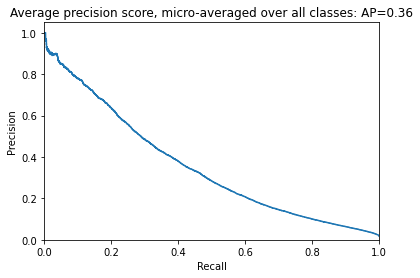

In [196]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))